In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

## Estatística descritiva
O df.describe() gera estatísticas descritivas para auxiliar na compreensão de qual a melhor forma de distribuição dos dados. A partir dessa função, é possível visualizar o calculo de estatísticas como média, desvio padrão, valores mínimoe máximo, bem como percentis.

In [4]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Mapa de calor da correlação
De acordo com o mapa gerado pela expressão sns.heatmap(df.corr()), é possível visualizar a correlação entre os dados contidos no dataset. Quanto mais clara a cor apresentada no mapa, maior a correlação entre os dados apontados na respectiva linha e coluna. por exemplo, a correlação entre o tipo de dor (chest pain type) e a angina por esforço (exercise angina) é maior do que a correlação existente entre a idade (age) e a frequência cardíaca máxima (max heart rate). Em outras palavras, o tipo de dor percebido pela pessoa e a angina por esforço (sensação de pressão no peito sentida no momento de algum esforço ou exercício físico) tem maior relevância quando se trata de doenças do coração, do que a idade e a frequência cardíaca máxima propriamente.

<Axes: >

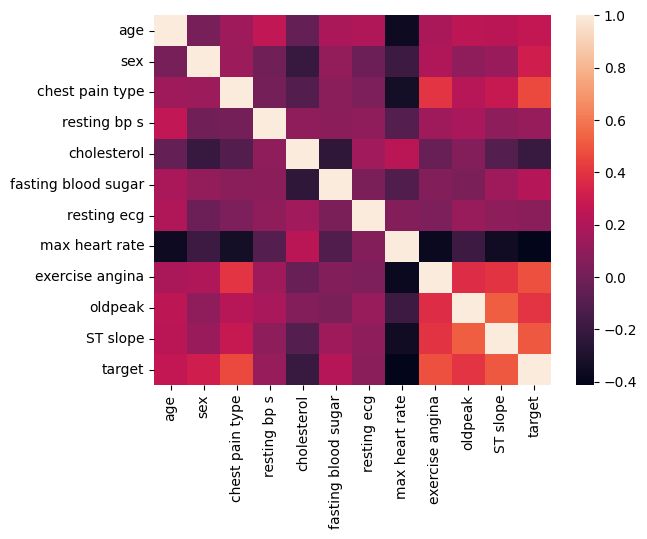

In [6]:
sns.heatmap(df.corr())

## Gráfico de dispersão
A função plt.scatter() é responsável por plotar um gráfico de dispersão a partir dos eixos x e y definidos pelas funções plt.xlabel() e plt.ylabel(). 
O gráfico de dispersão visualiza a relação entre Age (idade) e Chest pain type (tipo de dor no peito) das pessoas. As principais observações são:
1. Concentração de Pontos: Há uma alta densidade de pontos nas dores rotuladas como 1, 2, 3 e 4, e é mais comum que pessoas com idade superior a 60 anos sintam dores dos tipos 3 e 4;
2. Variabilidade: Pouca variabilidade nos tipos de dores em todas as faixas de idade examinadas;
3. Outliers: Alguns pontos isolados podem representar casos atípicos de dores.


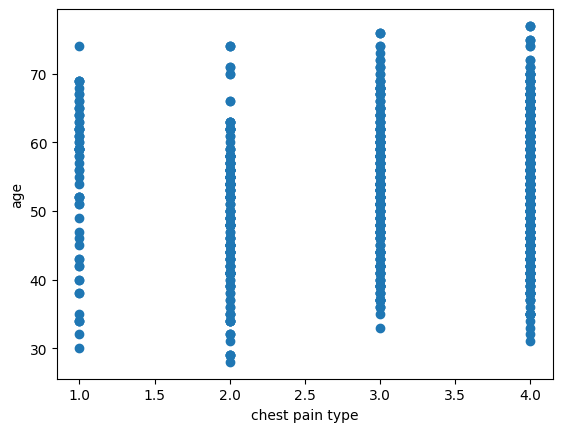

In [24]:
plt.scatter(df['chest pain type'],df['age'])
plt.xlabel("chest pain type")
plt.ylabel("age")
plt.show()

## Remoção de atributos que não contribuem para o grupamento
É usada a função df.drop() para remover atributos que não contribuem para a clusterização. No entanto, no caso do dataset escolhido, todos os atributos contidos no arquivo têm maior ou menor influência, a depender do tipo de análise realizada.

## Quantidade ideal de clusters
Neste momento é calculada a inércia (SSE) para diferentes números de clusters (k). A Inércia (SSE) é a soma das distâncias quadradas de cada ponto ao centroide do seu cluster. Quanto menor a inércia, melhor os pontos estão agrupados.
A variável k_rng gera uma lista de números de 1 a 9. Isso representa o número de clusters que estão sendo testados.
Já a função km.fit ajusta o modelo K-Means aos dados, a fim de encontrar quantos clusters (grupos) são ideais para os dados.

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
   km = KMeans(n_clusters=k)
   km.fit(df[['chest pain type','age']])
   sse.append(km.inertia_)
print(sse)

[105168.33781512605, 35749.60469890047, 18231.51680581396, 12034.774634838523, 8124.50756055745, 6252.5040491586515, 4729.583484290381, 4210.3064119381725, 3628.2154615569702]


## Método Elbow
Plota um gráfico para encontrar a curva chamada de "cotovelo". Neste gráfico, o ponto onde a curva começa a achatar indica o número ideal de clusters. Esse ponto de inflexão é onde adicionar mais clusters não resulta em uma redução significativa na inércia. Neste gráfico, o ponto está em k=3.

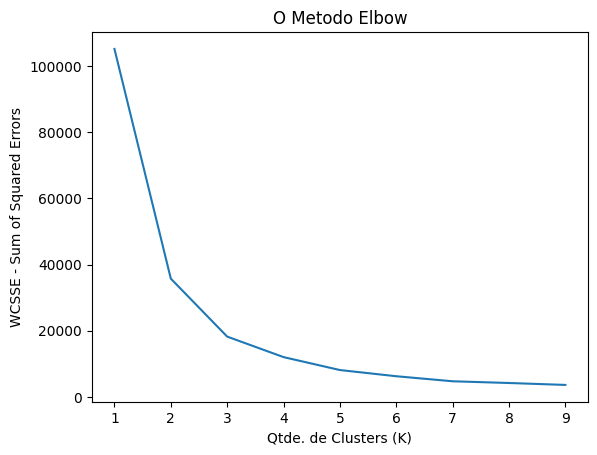

In [28]:
plt.title('O Metodo Elbow') 

plt.xlabel('Qtde. de Clusters (K)') 

plt.ylabel('WCSSE - Sum of Squared Errors') # Within Cluster Sum of Squares 

plt.plot(k_rng,sse)

## Clusterização com K-means
O K-means é um dos principais algoritmos de clustering na área de ciência de dados. A partir desse algoritmo, é possível analisar em qual das colunas os dados se encaixam melhor.
Cada valor no array representa o cluster ao qual o ponto de dado correspondente foi atribuído.
Utiliza-se a função fit_predict() para ajustar o modelo aos dados e, ao mesmo tempo, predizer os clusters para cada ponto de dado. 
A variável y_predicted consiste em uma lista de rótulos de clusters que indica a qual cluster cada tipo de dor pertence. Por exemplo, uma dor pode ser atribuída ao cluster 0, 1 ou 2.

In [29]:
km = KMeans(n_clusters=3) 

y_predicted = km.fit_predict(df[['chest pain type','age']]) 

y_predicted

array([1, 0, 1, ..., 0, 0, 1])

A seguir, é criada a coluna cluster, atribuindo o lugar de dado no centroide.
Cluster aqui pode ser entendido como uma etiqueta que categoriza o dado.
Neste momento, separam-se possiveis grupos de dados, especificando o cluster, e adiciona-se os rótulos de clusters ao DataFrame. Com isso, o DataFrame df passa a ter uma nova coluna chamada cluster, indicando a qual cluster cada dor pertence.

In [30]:
km.cluster_centers_
df['cluster']=y_predicted 

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
0,40,1,2,140,289,0,0,172,0,0.0,1,0,1
1,49,0,3,160,180,0,0,156,0,1.0,2,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0,1
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0,0


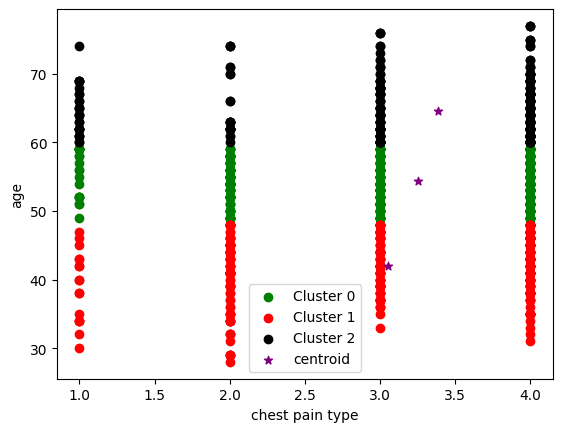

In [31]:
df1 = df[df.cluster==0] 

df2 = df[df.cluster==1] 

df3 = df[df.cluster==2] 

plt.scatter(df1['chest pain type'],df1['age'] ,color='green',label='Cluster 0') 

plt.scatter(df2['chest pain type'],df2['age'] ,color='red',label='Cluster 1') 

plt.scatter(df3['chest pain type'],df3['age'] ,color='black',label='Cluster 2') 

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') 

plt.xlabel("chest pain type") 

plt.ylabel('age') 

plt.legend()

Os dados são separados em df1, df2 e df3, que são subconjuntos do Data Frame original, cada um contendo apenas as dores do respectivo cluster.
Cada cluster é plotado com uma cor diferente. Os centróides (pontos médios dos clusters) são marcados com estrelas roxas. Isso ajuda a visualizar como as dores estão agrupadas.
Essas etapas ajudam a segmentar as dores em grupos com características similares. Isso facilita a análise e a tomada de decisões informadas, permitindo ações específicas para cada grupo.